In [1]:
%compiler: gfortran
use, intrinsic :: iso_fortran_env
print *, compiler_version()
end

 GCC version 9.2.1 20190827 (Red Hat 9.2.1-1)


In [ ]:
%compiler: ifort .f
      PARAMETER(N = 100)
      OPEN(9, FILE = 'SINCOS.XY')
      PI = 4.0 * ATAN(1.0)
      DO 10 I = 0, N
        X = 2.0 * I * PI / N  
        WRITE(9, *) X, SIN(X), COS(X)
   10 CONTINUE
      STOP 'NORMAL TERMINATION'
      END

In [3]:
%compiler: gfortran .f
      PARAMETER(N = 100)
      OPEN(9, FILE = 'SINCOS.XY')
      PI = 4.0 * ATAN(1.0)
      DO 10 I = 0, N
        X = 2.0 * I * PI / N  
        WRITE(9, *) X, SIN(X), COS(X)
   10 CONTINUE
      STOP 'NORMAL TERMINATION'
      END

STOP NORMAL TERMINATION


In [4]:
%writefile: Laurence_Sterne.txt
“Cupid! Cupid! prince of Gods and men.”
Laurence Sterne. (1713–1768).  A Sentimental Journey through France and Italy.

write to file:Laurence_Sterne.txt

In [5]:
%compiler: gcc .c
#include <stdio.h>
int main(void) {
    printf("Hello world\n");
    return 0;  
}

Hello world


In [6]:
%compiler: g++ .c++
#include <iostream>

using namespace std;

int main() {
    std::cout << "Hello World!" << std::endl;
    return 0;
}

Hello World!


In [9]:
%compiler: gfortran
%module: m
%fcflags: -O2
!
! The Sieve of Eratosthenes
!
module m_eratos
    implicit none
contains
    integer function nprimes(n) 
        integer, intent(in) :: n
        logical, allocatable :: tab(:)
        integer :: i
        allocate(tab(2:n), source = .true.)
        do i = 2, int(sqrt(real(n)))
            if (tab(i)) tab(i**2::i) = .false.
        end do
        nprimes = count(tab)
    end function nprimes    
end module m_eratos

[ifort kernel] module objects created successfully: m.o

In [11]:
%compiler: gfortran
%fcflags: m.o
program test
    use m_eratos
    implicit none
    integer :: i 
    do i = 1, 8
       write(*, *) i, 10**i, nprimes(10**i), nint(10**i / log(10.0**i))
       write(9, *) i, 10**i, nprimes(10**i), nint(10**i / log(10.0**i))
    end do
end program test

           1          10           4           4
           2         100          25          22
           3        1000         168         145
           4       10000        1229        1086
           5      100000        9592        8686
           6     1000000       78498       72382
           7    10000000      664579      620421
           8   100000000     5761455     5428681


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
_fig = plt.figure( args )
...

( user inputs are executed by Python's exec command )

...

plt.show()

In [14]:
%compiler: gfortran
%fcflags: m.o -O2  
program prime
    use m_eratos
    implicit none
    integer :: i 
    open(9, file = 'primes.csv')
    write(9, '(5g0)') 'n', ',', 'primes', ',', 'n/log(n)'
    do i = 2, 501
      ! write(*, *) i, ',', nprimes(i)
       write(9, '(5g0)') i, ',', nprimes(i), ',', i / log(real(i)) 
    end do
    stop 'normal end'
end program prime

STOP normal end


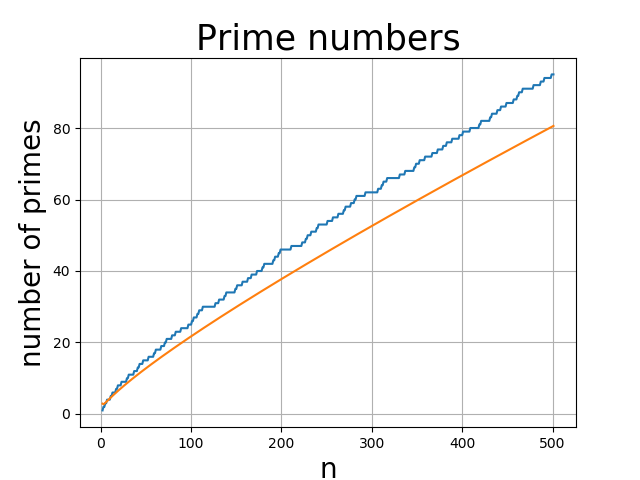

In [15]:
%fig:
x, y1, y2 = np.loadtxt('primes.csv', unpack = True, delimiter=',', skiprows=1) 
plt.grid(which='both')
plt.plot(x, y1)
plt.plot(x, y2)
plt.title('Prime numbers', fontsize = 25)
plt.xlabel('n', fontsize = 20)
plt.ylabel('number of primes', fontsize = 20)

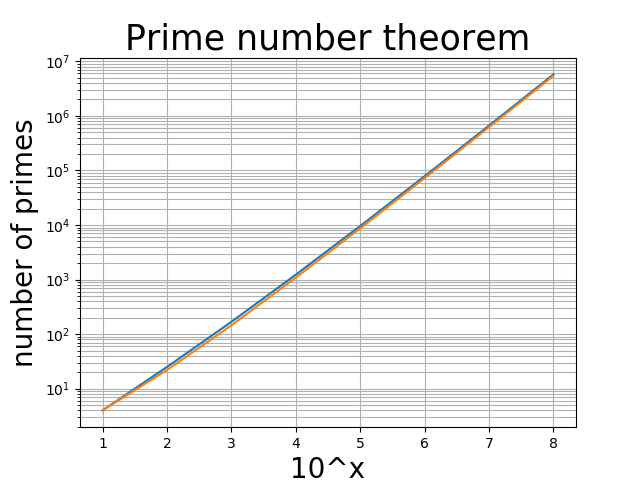

In [16]:
%fig:
x, y1, y2, y3 = np.loadtxt('fort.9', unpack = True)
plt.yscale('log')
plt.grid(which='both')
plt.plot(x, y2)
plt.plot(x, y3)
plt.title('Prime number theorem', fontsize = 25)
plt.xlabel('10^x', fontsize = 20)
plt.ylabel('number of primes', fontsize = 20)

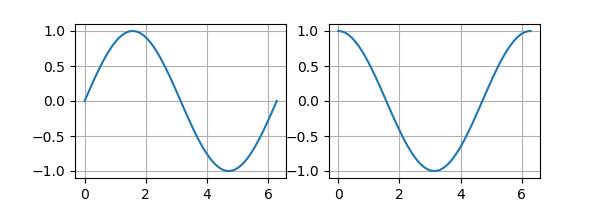

In [17]:
%fig:figsize=(6, 2)
x, y1, y2 = np.loadtxt('SINCOS.XY', unpack = True)
plt.subplot(1, 2, 1)
plt.grid(which='both')
plt.plot(x, y1)
plt.subplot(1, 2, 2)
plt.grid(which='both')
plt.plot(x, y2)

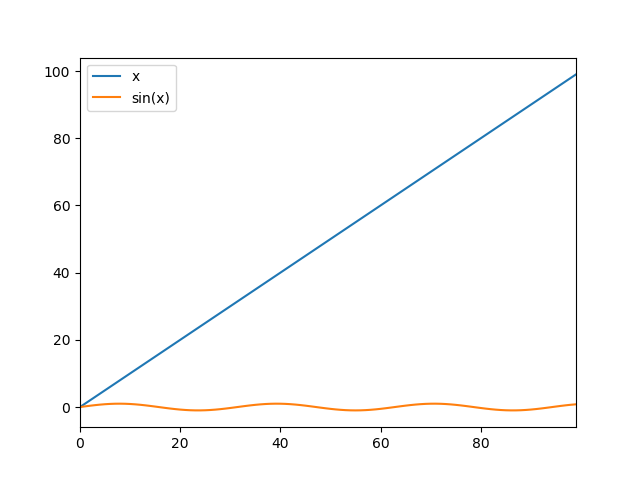

In [18]:
%fig:
import pandas as pd
ax = _fig.add_subplot(1, 1, 1)

x = np.arange(100)
df = pd.DataFrame({'x': x, 'sin(x)': np.sin(x / 5)})
df.plot(ax=ax)

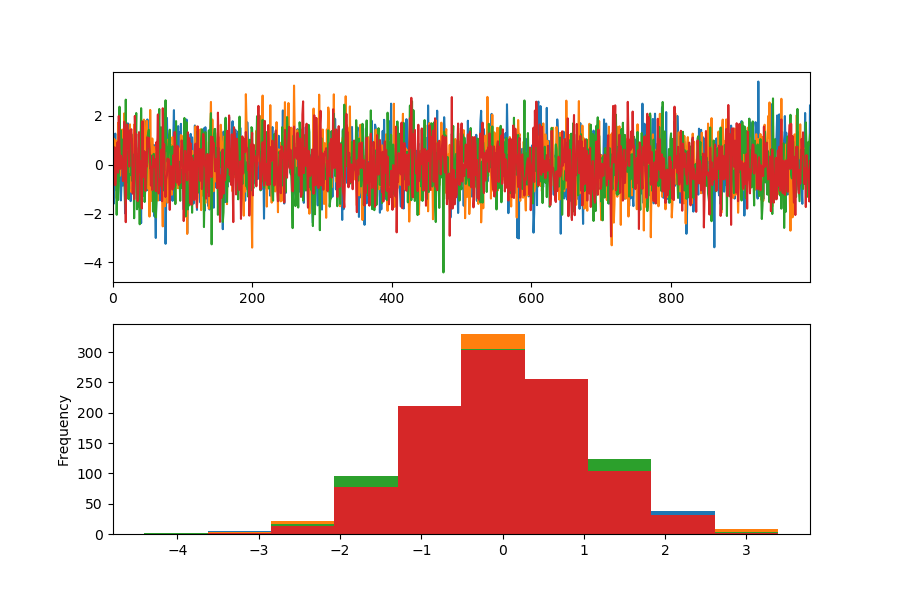

In [19]:
%fig:
from pandas import *
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(9, 6))
_fig = fig
# Multiple assignment is not allowed for _fig.

df = DataFrame(np.random.randn(1000, 4))
df.plot(ax=axes[0], legend=False)
df.plot(ax=axes[1], legend=False, kind='hist')

In [20]:
%py:
from sympy import *
x = Symbol('x')
bernoulli_gen = x / (exp(x) - 1)
print bernoulli_gen

bernoulli_ser = series(bernoulli_gen , x, 0, 10).removeO()
btmp = Poly(bernoulli_ser, x).coeffs()
bernoulli = [0,0,0,0,0,0]

bernoulli[0] = factorial(0) * btmp[5]
bernoulli[1] = factorial(1) * btmp[4]
bernoulli[2] = factorial(2) * btmp[3]
bernoulli[3] = factorial(4) * btmp[2]
bernoulli[4] = factorial(6) * btmp[1]
bernoulli[5] = factorial(8) * btmp[0]

print bernoulli

x/(exp(x) - 1)
[1, -1/2, 1/6, -1/30, 1/42, -1/30]


In [31]:
%py:
x = 3+5
print x

8


In [32]:
%py:
x = range(5)
print x

range(0, 5)


In [39]:
%py:
for i in range(5): i = i + i
print (i)

8


In [57]:
%compiler: gfortran

program test_double_colon
    implicit none

    integer :: i
    real, dimension(100) :: tab

    tab (1::5) = 12345.0
        
    do i = 1, 5
        print *, tab(i)
    end do

end program test_double_colon

   12345.0000    
   0.00000000    
   0.00000000    
   0.00000000    
   2.80259693E-45


In [58]:
%compiler: gfortran

program kinds

    use iso_fortran_env
    implicit none
    print *, real_kinds
end program kinds

           4           8          10          16
